### Sales Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the dataset

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Datasets\\sales_data.csv",encoding='unicode_escape')
data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


#### Checking the null values into the dataset

In [3]:
data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

#### Dropping the columns having null values into the dataset

In [4]:
data = data.drop(columns = ["Status","unnamed1"])

In [5]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

#### Checking the duplicate values and dropping it from the dataset

In [6]:
data.duplicated().any()

True

In [7]:
data = data.drop_duplicates()

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

#### Shape of the dataset

In [10]:
print("No. of rows = ",data.shape[0])
print("No. of columns = ",data.shape[1])

No. of rows =  11231
No. of columns =  13


#### Information regarding the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


#### Describe regarding the dataset

In [12]:
data.describe(include = "all")

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,1.123100e+04,11231,11231,11231,11231,11231.000000,11231.000000,11231,11231,11231,11231,11231.000000,11231.000000
unique,NaN,1250,2350,2,7,NaN,NaN,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,F,26-35,NaN,NaN,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7828,4536,NaN,NaN,1942,4287,1581,2653,NaN,NaN
mean,1.003004e+06,NaN,NaN,NaN,NaN,35.411985,0.419998,NaN,NaN,NaN,NaN,2.489093,9454.084982
std,1.716055e+03,NaN,NaN,NaN,NaN,12.756116,0.493580,NaN,NaN,NaN,NaN,1.114880,5221.728776
min,1.000001e+06,NaN,NaN,NaN,NaN,12.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,188.000000
25%,1.001492e+06,NaN,NaN,NaN,NaN,27.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,5443.000000
50%,1.003065e+06,NaN,NaN,NaN,NaN,33.000000,0.000000,NaN,NaN,NaN,NaN,2.000000,8109.000000
75%,1.004428e+06,NaN,NaN,NaN,NaN,43.000000,1.000000,NaN,NaN,NaN,NaN,3.000000,12677.500000


#### Changing the data type of column Amount from float to int 

In [13]:
data["Amount"] = data["Amount"].astype(int)

In [14]:
data["Amount"].dtype

dtype('int32')

#### Counting the male and female who are in the dataset

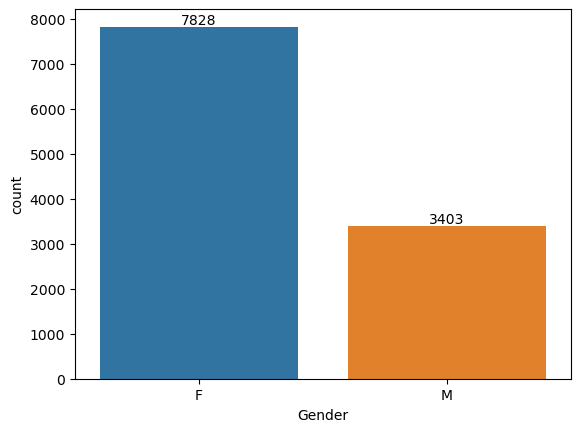

In [15]:
a = sns.countplot(x = "Gender",data = data,hue = "Gender")
for x in a.containers:
    a.bar_label(x)

##### Conclusion : Female buyers are more than male buyers.

#### Total amount spend by different gender

In [16]:
sales_gen = data.groupby(["Gender"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sales_gen

,Gender,Amount
0,F,74307679
1,M,31871146


##### Conclusion : Female have spent highest amount of money

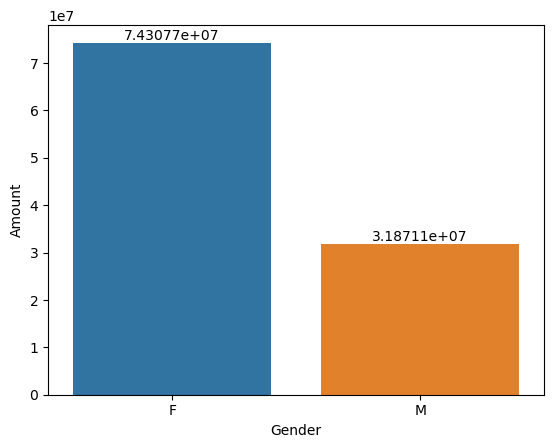

In [17]:
b= sns.barplot(x = "Gender",y = "Amount",data = sales_gen,hue = "Gender")
for x in b.containers:
    b.bar_label(x)
plt.show()

#### Age group analysis

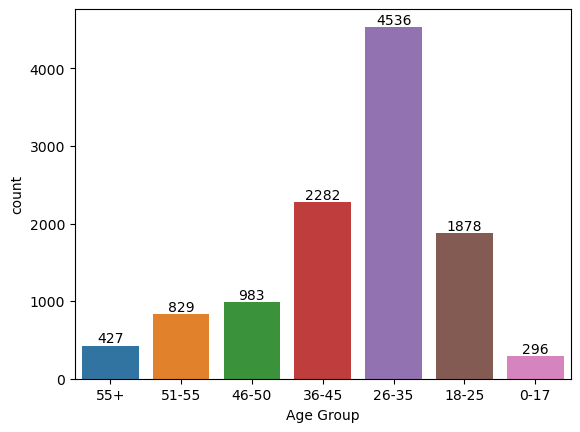

In [18]:
Age_g = data.sort_values(by = "Age Group",ascending = False)
c = sns.countplot(x = "Age Group",data = Age_g,hue = "Age Group")
for x in c.containers:
    c.bar_label(x)

##### Conclusion : People of age between 26-35 have high sales statistical data of buying and least of 0-17.

#### Total number of orders from top 10 states

In [19]:
d = data.groupby(["State"],as_index = False)["Orders"].sum().sort_values(by = "Orders",ascending = False).head(10)
d

,State,Orders
14,Uttar Pradesh,4803
10,Maharashtra,3798
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1106
3,Gujarat,1063


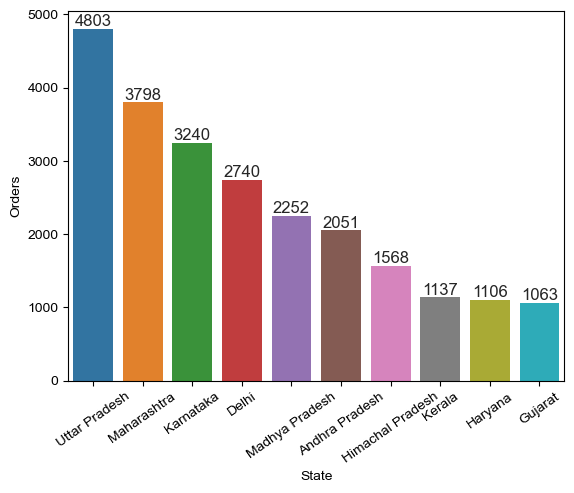

In [20]:
q = sns.barplot(x = "State",y = "Orders",data = d,hue  ="State")
sns.set(rc={"figure.figsize":(15,5)})
plt.xticks(rotation = 35)
for x in q.containers:
    q.bar_label(x)

##### Conclusion : Uttar Pradesh have got the highest number of orders.

#### Marital Status

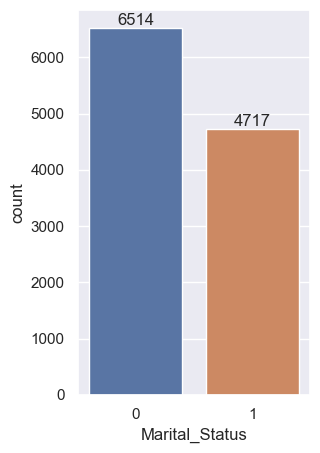

In [22]:
a = sns.countplot(x = "Marital_Status",data = data,hue = "Marital_Status",legend = False)
sns.set(rc={"figure.figsize":(3,5)})
for x in a.containers:
    a.bar_label(x)

##### Conclusion : People who are not married have high sales.

#### Sorting values by Amount based on gender and marital status

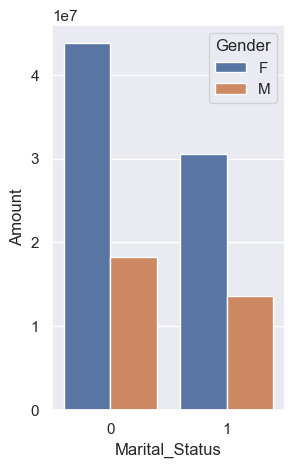

In [23]:
sales_state = data.groupby(["Marital_Status","Gender"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(x = "Marital_Status",y = "Amount",data = sales_state,hue = "Gender")
plt.show()

##### Conclusion : Amount spend by Female whether married or not have spended a large amount of money than males.

#### Occupation

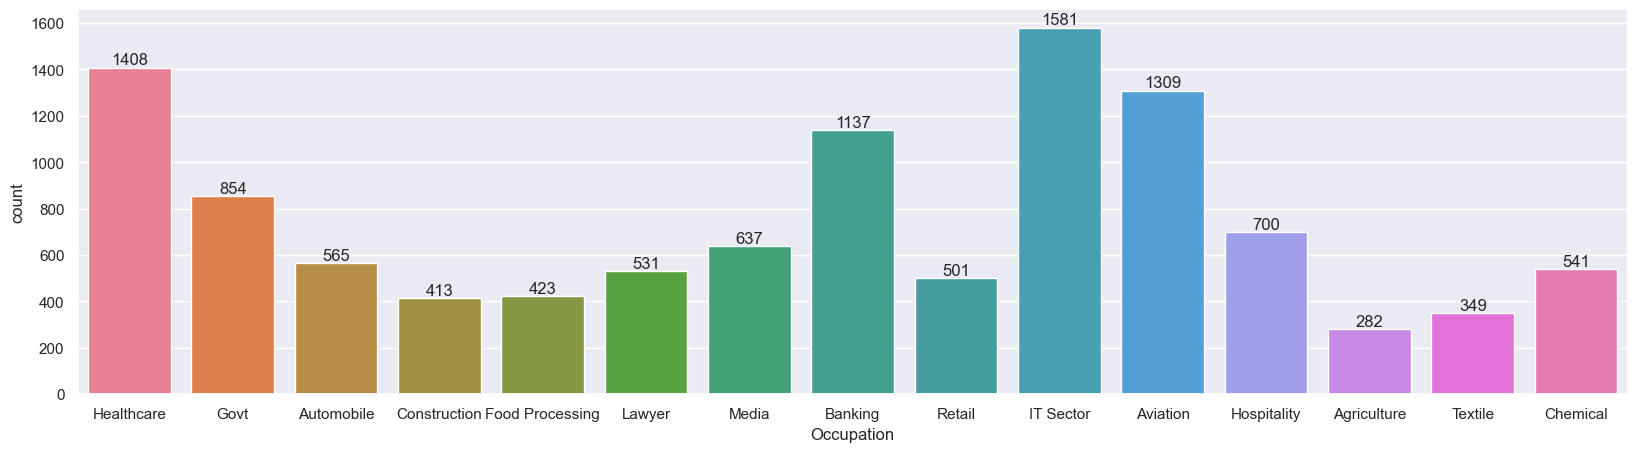

In [25]:
ax = sns.countplot(x = "Occupation",data = data,hue = "Occupation")
sns.set(rc={"figure.figsize":(20,5)})
for x in ax.containers:
    ax.bar_label(x)

##### Conclusion: IT sector have highest sales occupation.

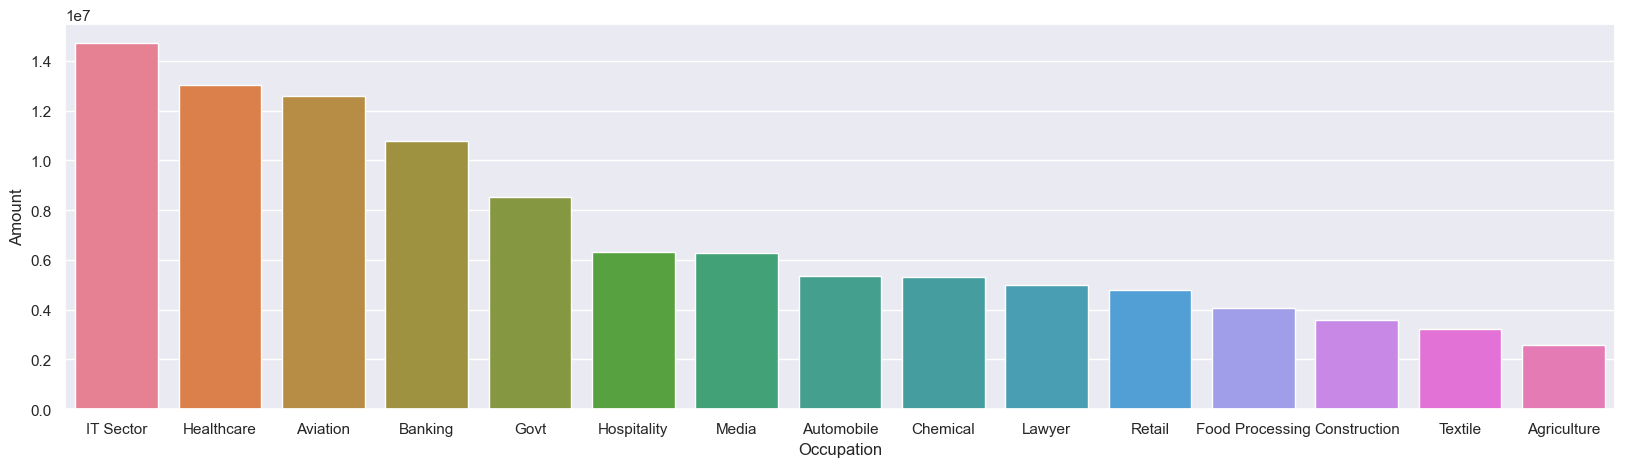

In [26]:
sales_state = data.groupby(["Occupation"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.set(rc = {"figure.figsize":(20,5)})
sns.barplot(x = "Occupation",y = "Amount",data = sales_state,hue = "Occupation")
plt.show()

##### Conclusion: It sector spend highest amount of money in analyzing sales.

#### Product Category Analysis

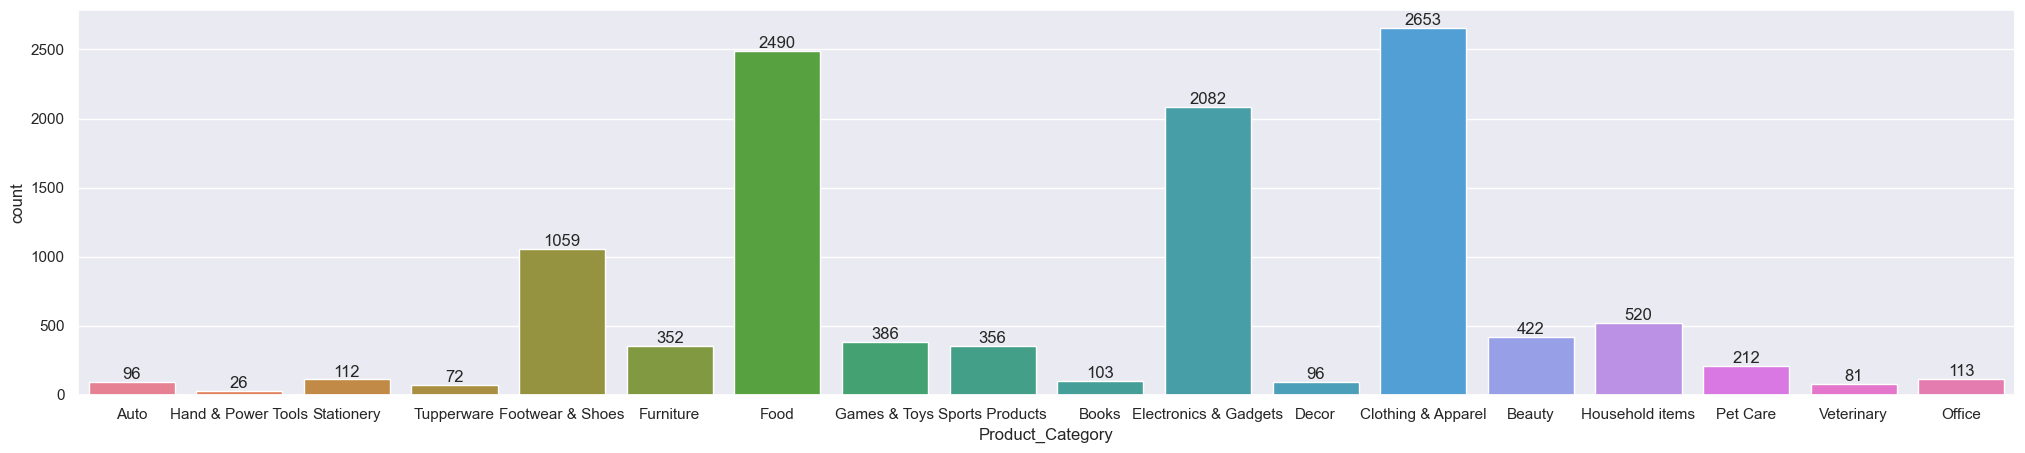

In [31]:
ax = sns.countplot(x = "Product_Category", data = data, hue = "Product_Category")
sns.set(rc={"figure.figsize":(25,5)})
for x in ax.containers:
    ax.bar_label(x)

##### Conclusion : The count of clothng & Apparel in sales is greater than every Product Category.

#### Sum of Amount by Product Category

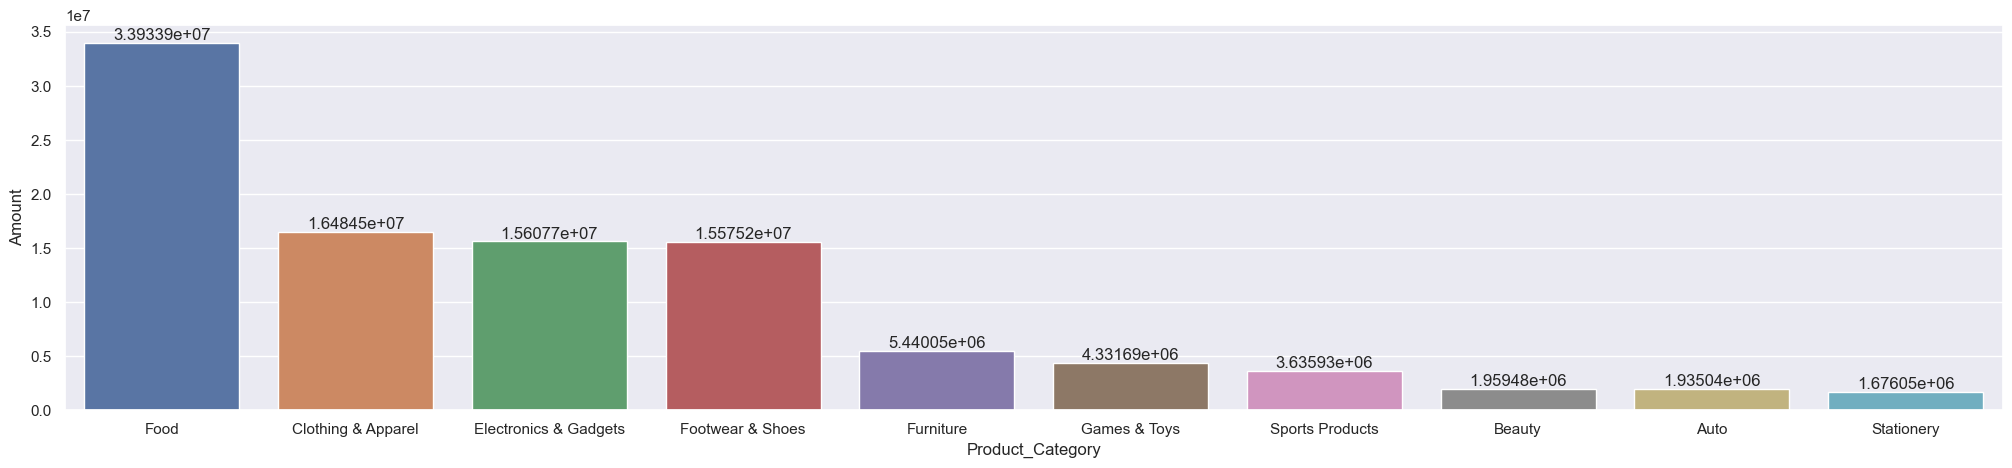

In [36]:
sales_state = data.groupby(["Product_Category"],as_index = False)["Amount"].sum().sort_values(by = "Amount",ascending = False).head(10)
sns.set(rc = {"figure.figsize":(25,5)})
a = sns.barplot(x = "Product_Category",y = "Amount",data = sales_state,hue = "Product_Category")
for x in a.containers:
    a.bar_label(x)
plt.show()

##### Conclusion : Amount spent on Food is greater than other products. 

#### Orders according to the product id

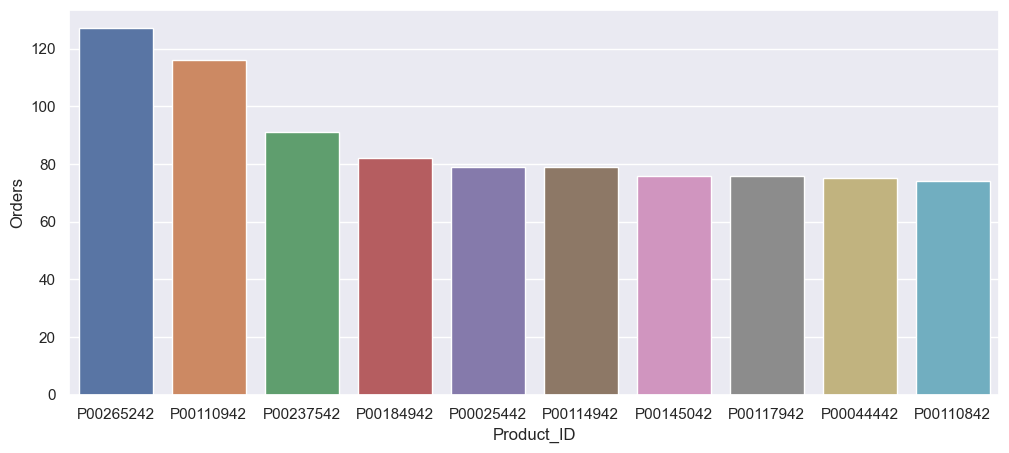

In [42]:
sales_state = data.groupby(['Product_ID'],as_index = False)["Orders"].sum().sort_values(by = "Orders",ascending = False).head(10)
sns.set(rc = {"figure.figsize":(12,5)})
sns.barplot(x = "Product_ID",y = "Orders",data = sales_state,hue = "Product_ID")
plt.show()

#### Conclusion

##### Married women age group 26-35 yrs from UP,Maharashtra and Karnataka working in IT,Healthcare and Aviation are buying most products of food,clothing and electronics category.